# Clustering for r-f

## Phase 1


### Notebook by [Marco Tavora](https://marcotavora.me/)

## Table of contents

1. [Introduction](#Introduction)
2. [Import modules](#Import-modules)
4. [Auxiliar functions](#Auxiliar-functions)
3. [RetailMatch](#RetailMatch)
5. [Toy Dataset](#Toy-Dataset)
5. [Shoppings](#Shopping)

## Introduction
[[go back to the top]](#Table-of-contents)

From [this source](https://arxiv.org/pdf/1306.1704.pdf):

> The problem of identifying the optimal location for a new retail store has been the focus of past research,  especially in the field of land economy, due to its importance in the success of a business. Traditional approaches to the problem have factored in demographics, revenue and aggregated human flow statistics from nearby or remote areas. However, the acquisition of relevant data is usually expensive. With the growth of location-based social networks, fine grained data describing user mobility and popularity of places has recently become attainable. 

## Import modules
[[go back to the top]](#Table-of-contents)

This project... 

In [2]:
%run modules_rf.ipynb 

## Auxiliar functions
[[go back to the top]](#Table-of-contents)

In [11]:
def data_generator(rows, mu, ratio):
    nums = np.random.normal(mu, 
                            mu*ratio, 
                            rows)
    nums = [int(num) for 
            num in nums]
    return nums

def dummy_generator(rows, num_classes):
    lst = []
    for _ in range(rows):
        lst.append(randint(0, num_classes))
    return lst

def columns_generator(data, ratio):
    for col in data.columns.tolist()[1:]:
        data[col] = data_generator(rows, 
                                   data[col].mean(), 
                                   ratio)
    return data

def class_to_name(class_name):
    return(str(class_name).split('(')[0])



def lists_to_df(lst1,lst2,col_1,col_2):
    return pd.DataFrame({col_1: 
                         lst1,
                         col_2:
                         lst2})


def s_to_df(s, idx, col_name):
    s = s.to_frame().reset_index()
    s.columns = [idx, col_name]
    return s

def multi_replace(t, d):
    for i, j in d.items():
        t = t.replace(i, j)
    return t

def pairs_comb(df, cols, n):
    return [list(cols) for cols in 
         itertools.combinations(df[cols], n)]

## Table of contents

1. [Introduction](#Introduction)
2. [Data](#Data)
3. [K-Means Clustering](#K-Means-Clustering)

## RetailMatch
[[go back to the top]](#Table-of-contents)


[RetailMatch](https://www.retailmatch.io/agents/)

<img src="retailmatch1.png" style="width:400px;"/>

<img src="retailmatch2.png" style="width:400px;"/>

<img src="retailmatch3.png" style="width:400px;"/>

<img src="retailmatch4.png" style="width:400px;"/>

<img src="retailmatch5.png" style="width:400px;"/>

<img src="retailmatch6.png" style="width:400px;"/>

<img src="retailmatch7.png" style="width:400px;"/>

Sources:
- [Lojas em Shopping Centers](http://www.faccamp.br/new/arq/pdf/mestrado/Documentos/producao_discente/givaldo_guilherme_dos_santos.pdf)


<img src="shopping_info.png" style="width:400px;"/>

## Auxiliar functions
[[go back to the top]](#Table-of-contents)

## Toy Dataset
[[go back to the top]](#Table-of-contents)

## Shoppings
[[go back to the top]](#Table-of-contents)

In [257]:
shopping = pd.read_csv('datashopping.csv', index_col=0)
shopping.head()
shopping.tail()
shopping.shape

,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,0,389,15256,7,7,1369
1,1,540,36750,6,10,986
2,2,394,33647,5,8,1275
3,3,365,16543,4,12,1167
4,4,319,30950,3,10,616


,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
995,995,358,27612,6,6,972
996,996,289,29738,5,7,860
997,997,230,34141,4,16,710
998,998,365,28738,4,3,518
999,998,327,16488,5,8,1028


(1000, 6)

To each row in the `shopping` dataframe there is a full dataframe `varejista_shopping_0`. Now I will concatenate the first row of `shopping` with the dataframe `varejista_shopping_0`.

In [258]:
loja_shopping_0 = pd.read_csv('dataloja.csv')


row = list(shopping.iloc[0,:])
cols = shopping.columns.tolist()

for i in range(len(shopping.columns.tolist())):
    loja_shopping_0[cols[i]] = row[i]
    
loja_shopping_0.head()

,loja,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,0,41,5,3,24,0,389,15256,7,7,1369
1,1,42,5,1,26,0,389,15256,7,7,1369
2,2,29,5,2,20,0,389,15256,7,7,1369
3,3,33,3,4,26,0,389,15256,7,7,1369
4,4,29,2,4,20,0,389,15256,7,7,1369


In [259]:
loja_shopping_0 = loja_shopping_0.iloc[:,1:]
loja_shopping_0.head()

,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,41,5,3,24,0,389,15256,7,7,1369
1,42,5,1,26,0,389,15256,7,7,1369
2,29,5,2,20,0,389,15256,7,7,1369
3,33,3,4,26,0,389,15256,7,7,1369
4,29,2,4,20,0,389,15256,7,7,1369


In [198]:
print(list(loja_shopping_0.isnull().any()))

[False, False, False, False, False, False, False, False, False, False]


In [260]:
varejista = pd.read_csv('datavarejista.csv')

In [261]:
lst = []
for row in varejista['indice'].tolist():
    lst.append('varejista_' + str(row))

In [262]:
varejista['indice'] = lst
varejista.head()

,indice,segmento,quantidade_minima_domicilios,potencial_consumo_min,tamanho_loja_min,tamanho_loja_max,tamanho_min_frente,corredor,fluxo_minimo_pessoas_min
0,varejista_1,7,8086,765,33,41,3.9,4,5
1,varejista_2,2,7945,767,26,48,4.0,1,5
2,varejista_3,3,8159,758,31,41,4.2,5,6
3,varejista_4,7,8228,787,33,47,3.8,2,5
4,varejista_5,1,7859,766,31,45,4.2,2,4


In [263]:
varejista['quantidade_minima_domicilios'] = varejista['quantidade_minima_domicilios']/1000

In [264]:
print('Features are:')
for col in varejista.columns.tolist():
    print('-',col)

Features are:
- indice
- segmento
- quantidade_minima_domicilios
- potencial_consumo_min
- tamanho_loja_min
- tamanho_loja_max
- tamanho_min_frente
- corredor
- fluxo_minimo_pessoas_min


### Matching dataframe

By steps:
- The value of `quantidade_minima_domicilios` for `varejista_0` is:

In [265]:
print('Quantidade minima de domicilios para o {} (mil):'.format(varejista.iloc[0,0]), varejista.iloc[0,2])

Quantidade minima de domicilios para o varejista_1 (mil): 8.086


- Os shopping que satisfazem essa condição são: 

In [266]:
shopping.shape

(1000, 6)

In [268]:
shopping_varejista_1 = shopping[shopping['quantidade_domicilios_mil'] >= varejista.iloc[0,2]]
shopping_varejista_1.head()

,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
1,1,540,36750,6,10,986
3,3,365,16543,4,12,1167
4,4,319,30950,3,10,616
6,6,196,26778,4,10,1273
7,7,429,27709,2,10,942


- The value of `potencial_consumo_min` for `varejista_1` is:

In [269]:
print('Potencial minimo de consumo para o {}:'.format(varejista.iloc[0,0]), varejista.iloc[0,3])

Potencial minimo de consumo para o varejista_1: 765


Restringindo ainda mais a lista de shoppings:

In [270]:
shopping_varejista_1 = shopping_varejista_1[shopping_varejista_1['potencial_de_consumo_milhoes'] >=765]
shopping_varejista_1.head()

,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
1,1,540,36750,6,10,986
3,3,365,16543,4,12,1167
6,6,196,26778,4,10,1273
7,7,429,27709,2,10,942
8,8,417,29689,6,9,1249


Outras restrições:

In [271]:
print('Tamanho minimo de loja {}:'.format(varejista.iloc[0,0]), varejista.iloc[0,4])
print('Tamanho maximo de loja {}:'.format(varejista.iloc[0,0]), varejista.iloc[0,5])

Tamanho minimo de loja varejista_1: 33
Tamanho maximo de loja varejista_1: 41


Na tabela `shopping_varejista_1` nao existe informação sobre `loja_shopping_0`. Para continuar, precisamos da planilha `loja_shopping` para todos os shoppings em `shopping_varejista_1`.

In [281]:
print('Alguns dos shoppings:',list(shopping_varejista_1['shopping'])[0:5])

Alguns dos shoppings: [1, 3, 6, 7, 8]


Dentro do shopping correspondendo à lista de loja que temos, quais lojas obedecem as condições:

In [285]:
loja_shopping_0.head()

,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,41,5,3,24,0,389,15256,7,7,1369
1,42,5,1,26,0,389,15256,7,7,1369
2,29,5,2,20,0,389,15256,7,7,1369
3,33,3,4,26,0,389,15256,7,7,1369
4,29,2,4,20,0,389,15256,7,7,1369


In [286]:
varejista.iloc[0,4]

33

In [287]:
loja_shopping_0_varejista_1 = loja_shopping_0[loja_shopping_0['tamanho_da_loja'] >= varejista.iloc[0,4]]
loja_shopping_0_varejista_1.head()

,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,41,5,3,24,0,389,15256,7,7,1369
1,42,5,1,26,0,389,15256,7,7,1369
3,33,3,4,26,0,389,15256,7,7,1369
5,45,4,3,12,0,389,15256,7,7,1369
7,40,4,1,18,0,389,15256,7,7,1369


In [288]:
loja_shopping_0_varejista_1 = loja_shopping_0_varejista_1[loja_shopping_0_varejista_1['tamanho_da_loja'] <=varejista.iloc[0,5]]
loja_shopping_0_varejista_1.head()

,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,41,5,3,24,0,389,15256,7,7,1369
3,33,3,4,26,0,389,15256,7,7,1369
7,40,4,1,18,0,389,15256,7,7,1369
8,35,2,2,20,0,389,15256,7,7,1369
10,35,2,2,13,0,389,15256,7,7,1369


In [289]:
loja_shopping_0.head()
varejista.iloc[:,1:9].head()

,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto,shopping,total_de_lojas,total_ABL_m2,area_influencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes
0,41,5,3,24,0,389,15256,7,7,1369
1,42,5,1,26,0,389,15256,7,7,1369
2,29,5,2,20,0,389,15256,7,7,1369
3,33,3,4,26,0,389,15256,7,7,1369
4,29,2,4,20,0,389,15256,7,7,1369


,segmento,quantidade_minima_domicilios,potencial_consumo_min,tamanho_loja_min,tamanho_loja_max,tamanho_min_frente,corredor,fluxo_minimo_pessoas_min
0,7,8.086,765,33,41,3.9,4,5
1,2,7.945,767,26,48,4.0,1,5
2,3,8.159,758,31,41,4.2,5,6
3,7,8.228,787,33,47,3.8,2,5
4,1,7.859,766,31,45,4.2,2,4


## K-Means clustering
[[go back to the top]](#Table-of-contents)

In [65]:
print('Features are:')
for col in shopping.columns.tolist()[1:]:
    print('-',col)

Features are:
- total_de_lojas
- total_ABL_m2
- area_influencia_km2
- quantidade_domicilios_mil
- potencial_de_consumo_milhoes


###  Examine pairs of features 

- Plot them to see if there are obvious patters
- Initialize the instance `KMeans` 
- Try to fit our sub-dataframe using the `fit` method

In [106]:
shopping.columns.tolist()[1:]

['total_de_lojas',
 'total_ABL_m2',
 'area_influencia_km2',
 'quantidade_domicilios_mil',
 'potencial_de_consumo_milhoes']

In [66]:
n=2
cols_to_keep = shopping.columns.tolist()[1:]
pairs = pairs_comb(shopping, cols_to_keep, n)
print('Pairs:\n')
for col in pairs:
    print(col,'\n')

Pairs:

['total_de_lojas', 'total_ABL_m2'] 

['total_de_lojas', 'area_influencia_km2'] 

['total_de_lojas', 'quantidade_domicilios_mil'] 

['total_de_lojas', 'potencial_de_consumo_milhoes'] 

['total_ABL_m2', 'area_influencia_km2'] 

['total_ABL_m2', 'quantidade_domicilios_mil'] 

['total_ABL_m2', 'potencial_de_consumo_milhoes'] 

['area_influencia_km2', 'quantidade_domicilios_mil'] 

['area_influencia_km2', 'potencial_de_consumo_milhoes'] 

['quantidade_domicilios_mil', 'potencial_de_consumo_milhoes'] 



In [67]:
N = shopping.shape[0]
s, c, l = (15*np.random.rand(N))**2, np.random.rand(N), len(pairs)

### Sample of scatter plots

In [ ]:
shopping = shopping[cols_to_keep]

fig = plt.figure(figsize=(40, 60));
fig.subplots_adjust(hspace=0.4, wspace=0.4);
for i in range(1, l+1):
    ax = fig.add_subplot(5, 2, i);
    x, y = pairs[i-1][0], pairs[i-1][1];
    ax.scatter(shopping[x], shopping[y], s=s, c=c, alpha=0.5);
    plt.ylabel(y, fontsize=35)
    plt.xlabel(x, fontsize=35)
fig.savefig('clusters-retail-16.png')

![title](clusters-retail-16.png)

### Run K-Means

In [72]:
features = ['total_de_lojas', 'potencial_de_consumo_milhoes'] 
shopping[features].head()

,total_de_lojas,potencial_de_consumo_milhoes
0,389,1369
1,540,986
2,394,1275
3,365,1167
4,319,616


In [73]:
k = 5
model = KMeans(n_clusters=k, 
               max_iter=1)
model.fit(shopping[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Assign clusters back to our dataframe

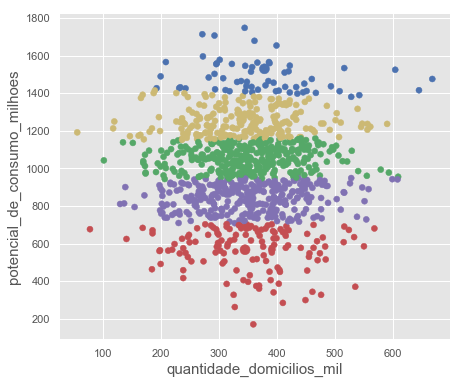

In [78]:
shopping_results = shopping.copy()
shopping_results['cluster'] = model.labels_
centroids  =  model.cluster_centers_

base_colors  =  ['r', 'g', 'b', 'y', 'm']
colors       =  [base_colors[centroid] for centroid in model.labels_]

fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(shopping_results[features[0]], shopping_results[features[1]], c=colors);
ax.scatter(centroids[:,0], centroids[:,1], c=base_colors, s=100);
plt.ylabel(features[0]);
plt.xlabel(features[1]);
plt.ylabel(y, fontsize=15);
plt.xlabel(x, fontsize=15);

## Score

In [79]:
silhouette = silhouette_score(shopping_results[features], 
                              shopping_results['cluster'], 
                              metric='euclidean')
inertia = model.inertia_
print("Silhouette Score: ", silhouette)
print("Inertia Score: ", inertia)

Silhouette Score:  0.32795864268218694
Inertia Score:  13549645.91350577


### What's predicted 

In [ ]:
print(list(model.labels_))

In [80]:
loja = pd.read_csv('dataloja.csv')
loja.head()

varejista = pd.read_csv('datavarejista.csv').head()
varejista

rows = raw.shape[0]
df = columns_generator(raw, 0.25)
df['corredor'] = dummy_generator(rows, 4)
df.head()

,loja,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto
0,0,41,5,3,24
1,1,42,5,1,26
2,2,29,5,2,20
3,3,33,3,4,26
4,4,29,2,4,20


,indice,segmento,quantidade_minima_domicilios,potencial_consumo_min,tamanho_loja_min,tamanho_loja_max,tamanho_min_frente,corredor,fluxo_minimo_pessoas_min
0,1,7,8086,765,33,41,3.9,4,5
1,2,2,7945,767,26,48,4.0,1,5
2,3,3,8159,758,31,41,4.2,5,6
3,4,7,8228,787,33,47,3.8,2,5
4,5,1,7859,766,31,45,4.2,2,4


NameError: name 'raw' is not defined

<a id='scaling'></a>
### Try standardizing the data first and see how it affects the cluster assignment


In [ ]:
from sklearn.preprocessing import StandardScaler

k = 3


ss = StandardScaler()
df[features] = ss.fit_transform(df[features])

model = KMeans(n_clusters = k)
model.fit(df[features])

# Check our results
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

# Get our centrois
centroids = model.cluster_centers_

# Setup some sweet colors for plotting (for later)
# colors = {'D':'red', 'E':'blue', 'F':'green'}
base_colors  =  ['r', 'g', 'b', 'y', 'k']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax = plt.subplots(figsize=(6,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(df[features[0]], df[features[1]], c=colors) # can also pass df['clusters'] as colors for quick and dirty plots
ax.scatter(centroids[:,0], centroids[:,1], c=base_colors, s=100) # cc.index

# And our score
silhouette = silhouette_score(df[features], df['cluster'], metric='euclidean')
inertia = model.inertia_
print("Silhouette Score: ", silhouette)
print("Inertia Score: ", inertia)

In [ ]:
# As you can see, sometimes there is not a well-defined elbow!
inertias = []
k_list = list(range(2,30))
for n_clusters in k_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df[features])
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

plt.plot(k_list, inertias, 'rx-')
plt.ylabel("Inertia")
plt.xlabel("x")
plt.title("Inertia");